# REPORT


## 1. summary

        Deep Q-Network for Collect Bananas

## 2. Networks and Algorithm

        DQN : A reinforcement learning algorithm that combines Q-Learning with deep neural networks to let RL work for complex, 
        high-dimensional environments, like video games, or robotics. Double Q Learning: Corrects the stock DQN algorithm's tendency to sometimes overestimate the values tied to specific actions.
        (from OpenAI Baselines: https://openai.com › blog › openai-baselines-dqn)
    
        hidden dim = [64,64]
        Network structure : Linear() -> Leaky_ReLu() -> Linear()-> Leaky_ReLu() -> Linear()



## 3. Parameters 

        buffer_size (Number of experiences to keep on the replay memory for the DQN) : 100000
        Batch_size : 64
        Gamma (Discount applied to future rewards) : 0.99
        TAU (Scaling parameter applied to soft update) : 1e-3
        Lr : 4e-4

        N_episodes : 1800
        max_t : 1000
        eps_start : 1
        eps_end : 0.01
        eps_decay : 0.98

# Code

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
from dqn_agent import Agent
import matplotlib.pyplot as plt
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="/home/tktk/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana.x86")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state

Episode 100	Average Score: 0.04
Episode 200	Average Score: 0.13
Episode 300	Average Score: -0.07
Episode 400	Average Score: 0.10
Episode 500	Average Score: 0.11
Episode 600	Average Score: 0.69
Episode 700	Average Score: 2.40
Episode 800	Average Score: 4.32
Episode 900	Average Score: 6.43
Episode 1000	Average Score: 8.51
Episode 1100	Average Score: 10.15
Episode 1200	Average Score: 13.98
Episode 1300	Average Score: 14.05
Episode 1400	Average Score: 11.19
Episode 1500	Average Score: 12.52
Episode 1600	Average Score: 15.17
Episode 1700	Average Score: 16.30
Episode 1800	Average Score: 15.05


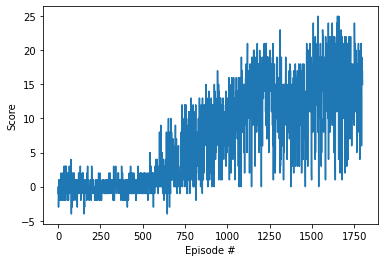

In [6]:
agent = Agent(state_size=37, action_size=4, seed=0)
scores = agent.train(env, n_episodes=1800, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.98)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
env.close()
path = '/home/tktk/deep-reinforcement-learning/p1_navigation'
torch.save(Agent,path+'model.pt')

# Future works

    1. using Dueling Double DQN is an effective way to improve the performence
    2. changing some parameters might be useful